In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\knataraj\\Desktop\\ML\\titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df)

891

In [5]:
inputs = df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Ticket'], axis='columns')
inputs.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [41]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [42]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [43]:
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [44]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()
le_Fare = LabelEncoder()
le_Age = LabelEncoder()
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs['Age_n'] = le_Age.fit_transform(inputs['Age'])
inputs['Fare_n'] = le_Fare.fit_transform(inputs['Fare'])
inputs.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n,Age_n,Fare_n
0,0,3,male,22.0,7.2500,1,28,18
1,1,1,female,38.0,71.2833,0,52,207
2,1,3,female,26.0,7.9250,0,34,41
3,1,1,female,35.0,53.1000,0,48,189
4,0,3,male,35.0,8.0500,1,48,43


In [45]:
target = df['Survived']

In [46]:
inputs_n = inputs.drop(['Sex','Age','Fare', 'Survived'], axis='columns')

In [47]:
inputs_n.head()

,Pclass,Sex_n,Age_n,Fare_n
0,3,1,28,18
1,1,0,52,207
2,3,0,34,41
3,1,0,48,189
4,3,1,48,43


In [48]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
model = tree.DecisionTreeClassifier()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size = 0.2)

In [50]:
len(X_train)

712

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
model.score(X_test, y_test)

0.7541899441340782

In [53]:
model.score(X_train, y_train)

0.9817415730337079

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [56]:
cm = confusion_matrix(y_test, y_pred)

In [57]:
cm

array([[93, 23],
       [21, 42]], dtype=int64)

Text(33.0, 0.5, 'Truth')

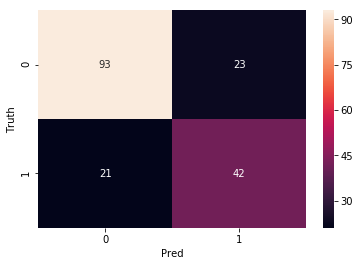

In [58]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Pred')
plt.ylabel('Truth')